#Q1

A Bernoulli random variable 𝑋 takes two possible values: 1 with probability(success) and 0 with probability 1−p (failure).

Bernoulli trial outcome: 1
Binomial simulation outcome: 614
Expected value for binomial: 300.0
Expected value for bernoulli: 0.6


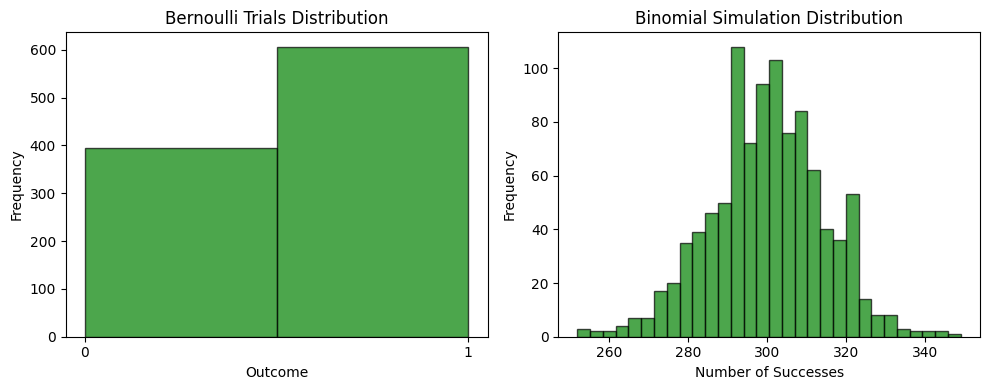

In [65]:
import numpy as np
#  X = 1 if U<p ; X = 0 if U>p
def bernoulli_trial(p):
  return 1 if np.random.random()<p else 0

# For binomial simulation we repeat the same logic for n trials and finding total number of successes
def binomial_sim(n,p):
  success = 0
  for i in range(n):
    success += bernoulli_trial(p)
  return success

#Example
p = 0.6
bernoulli_outcome = bernoulli_trial(p)
print(f"Bernoulli trial outcome: {bernoulli_outcome}")

# For Binomial
n = 1000
p_binom = 0.3
binomial_outcome = binomial_sim(n,p)
print(f"Binomial simulation outcome: {binomial_outcome}")

# Finding Expected values using simulation
expected_binom = n*p_binom
print(f"Expected value for binomial: {expected_binom}")

expected_ber = p
print(f"Expected value for bernoulli: {expected_ber}")

# Plotting Bernoulli Trials
bernoulli_trials = [bernoulli_trial(p) for _ in range(1000)]
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(bernoulli_trials, bins=2, edgecolor='black', alpha=0.7,color = 'g')
plt.xticks([0, 1])
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.title("Bernoulli Trials Distribution")

# Plotting Binomial Simulation
binomial_results = [binomial_sim(n, p_binom) for _ in range(1000)]
plt.subplot(1, 2, 2)
plt.hist(binomial_results, bins=30, edgecolor='black', alpha=0.7,color = 'g')
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Binomial Simulation Distribution")

plt.tight_layout()
plt.show()



#Q2

To simulate the rolling of a die (a 6-sided die), we can treat the problem as generating a random integer between 1 and 6. In Python, we can use the random module to simulate this process.

This will follow binomial distribution

In [ ]:
import numpy as np
def roll_die():
  return np.random.randint(1, 7)  # Generates a random integer between 1 and 6 (inclusive)

# simulating the number we get on each roll and storing it in a list.
def simulate_dice(num_rolls):
  rolls = []
  for i in range(num_rolls):
    rolls.append(roll_die())
  return np.mean(rolls)

num_simulations = 10000
average_outcomes = []
for i in range(num_simulations):
  average_outcomes.append(simulate_dice(100))

simulated_expectation = np.mean(average_outcomes)
print(f"Simulated expectation of the average of 100 die rolls: {simulated_expectation}")

theoretical_expectation = np.mean(np.arange(1,7))
print(f"Theoretical expectation of a single die roll: {theoretical_expectation}")

print(f"Theoretical expectation of the average of 100 die rolls: {theoretical_expectation}")


Simulated expectation of the average of 100 die rolls: 3.499703
Theoretical expectation of a single die roll: 3.5
Theoretical expectation of the average of 100 die rolls: 3.5


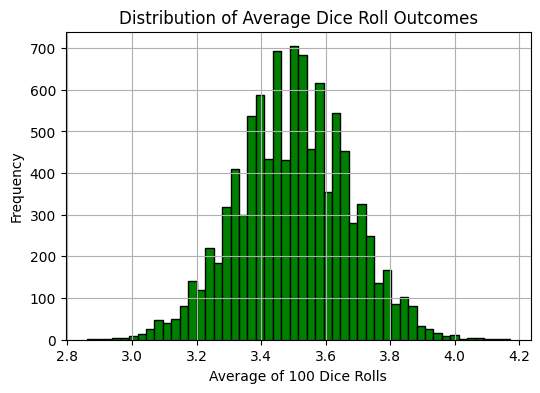

In [58]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6, 4))
plt.hist(average_outcomes, bins=50, edgecolor='black',color = 'g')  # Adjust bins as needed
plt.xlabel("Average of 100 Dice Rolls")
plt.ylabel("Frequency")
plt.title("Distribution of Average Dice Roll Outcomes")
plt.grid(True)
plt.show()


#Q3

Generating values using Inverse transformation method. X~exp(lambda)

F(X) = 1-exp(-lambda*x) is the cdf of the exponential distribution. For continous distribution cdf follows continous distribution i.e, F(X)~U(0,1)

let F(x) = u; x = -(1/lambda)log(1-u) which gives exponentially generated random variables.

Simulated Expectation: 1.9800327805706857
Theoretical Expectation: 2.0


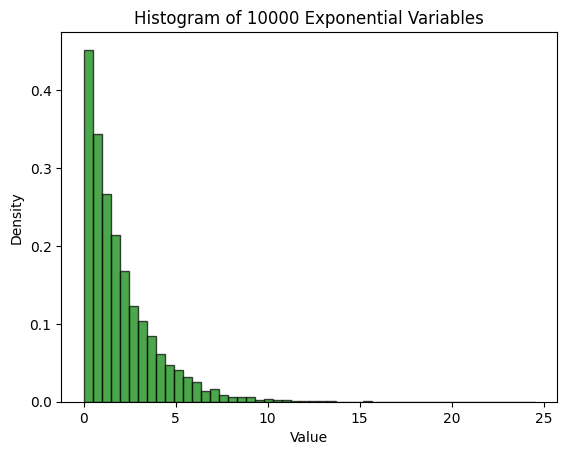

In [54]:
import numpy as np
def generate_exponential(lambd, num_samples):
    u = np.random.rand(num_samples)  # Generate uniform random variables
    return -np.log(1 - u) / lambd

# Parameters
lambd = 0.5
num_samples = 10000

X = generate_exponential(lambd, num_samples)

# Calculating means
simulated_expectation = np.mean(X)
theoretical_expectation = 1 / lambd

# Print results
print(f"Simulated Expectation: {simulated_expectation}")
print(f"Theoretical Expectation: {theoretical_expectation}")

# Histogram formed is verifying that simulated random variables are exponentially distributed.
plt.hist(X, bins=50, density=True, alpha=0.7, color='g',edgecolor = "black")
plt.title(f"Histogram of {num_samples} Exponential Variables")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

#Q4

Using Box Muller method for generating normal random variable

Histogram formed is verifying that simulated random variables are normally distributed.

Sample mean (Empirical Expectation): 0.004538967049757805
Theoretical mean (Expectation): 0


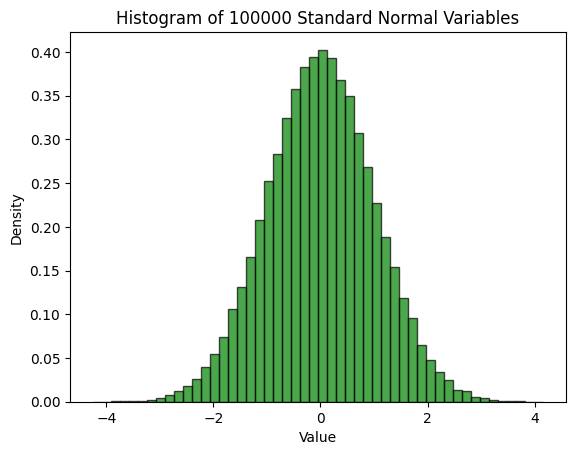

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Box-Muller method to generate standard normal random variables
def box_muller():
    u1 = np.random.random()
    u2 = np.random.random()
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z0, z1

# Number of samples
num_samples = 100000

# Generate normal random variables
normals = []
for _ in range(num_samples // 2):  # Generate pairs of Z0 and Z1
    z0, z1 = box_muller()
    normals.append(z0)
    normals.append(z1)

normals = np.array(normals)

sample_mean = np.mean(normals) #sample mean
theoretical_mean = 0  # Theoretical mean of standard normal distribution

# Output the results
print(f"Sample mean (Empirical Expectation): {sample_mean}")
print(f"Theoretical mean (Expectation): {theoretical_mean}")

# Plot histogram of the generated normal random variables
plt.hist(normals, bins=50, density=True, alpha=0.7, color='g',edgecolor = "black")
plt.title(f"Histogram of {num_samples} Standard Normal Variables")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


#Q5

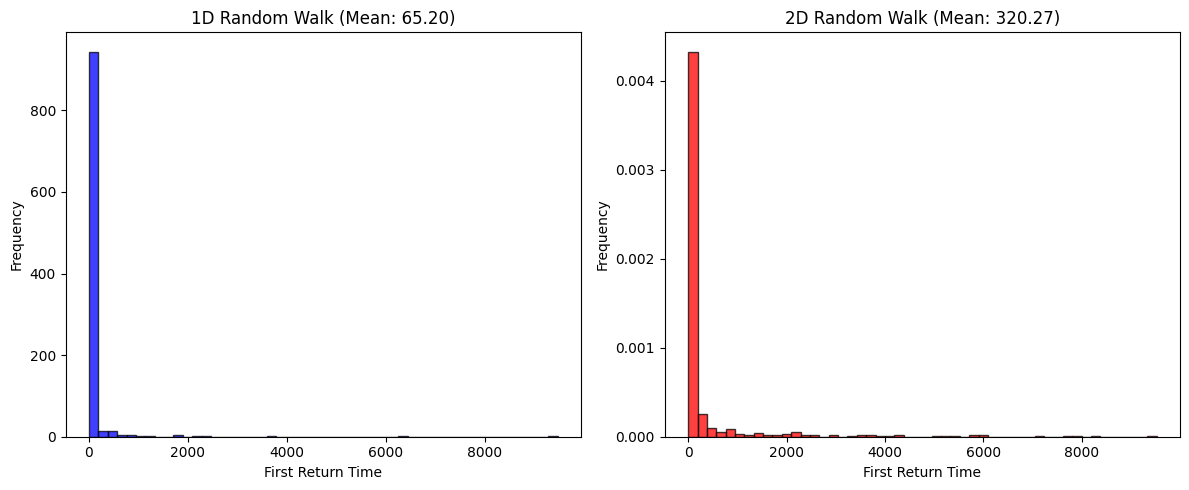

Mean first return time for 1D: 65.20
Mean first return time for 2D: 320.27


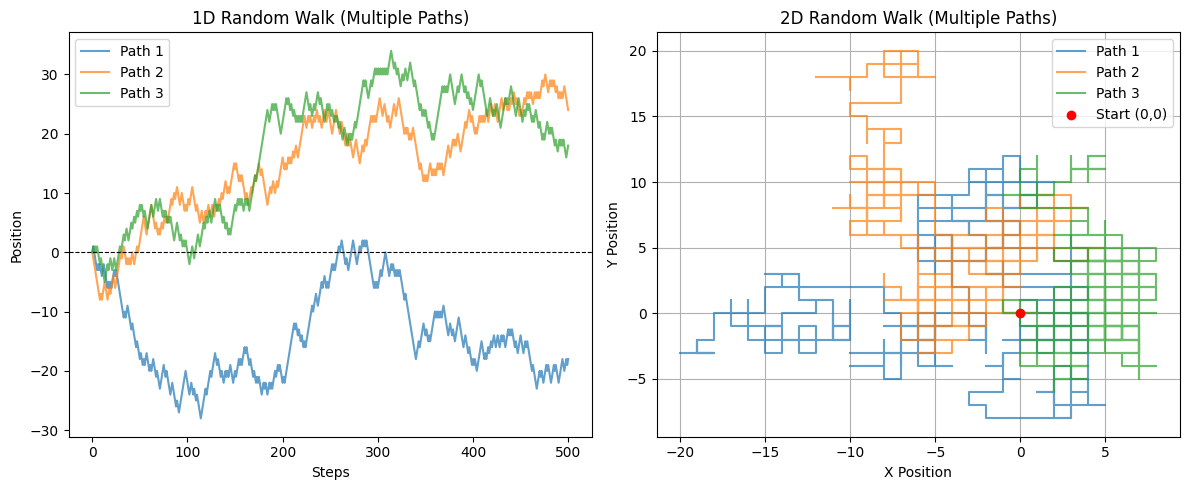

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# calculating first return times
def first_return_time_1D(max_steps=10000, trials=1000):
    return_times = []
    for _ in range(trials):
        position = 0
        for step in range(1, max_steps + 1):
            position += np.random.choice([-1, 1])  # Move left or right
            if position == 0:  # First return to origin
                return_times.append(step)
                break

    return np.mean(return_times), return_times

def first_return_time_2D(max_steps=10000, trials=1000):
    return_times = []

    for _ in range(trials):
        position = np.array([0, 0])  # Start at the origin
        for step in range(1, max_steps + 1):
            move = np.random.choice(["up", "down", "left", "right"])
            if move == "up":
                position[1] += 1
            elif move == "down":
                position[1] -= 1
            elif move == "left":
                position[0] -= 1
            else:  # move == "right"
                position[0] += 1

            if np.all(position == [0, 0]):  # First return to origin
                return_times.append(step)
                break

    return np.mean(return_times), return_times

# Run first return time simulations
mean_1D, times_1D = first_return_time_1D(trials=1000)
mean_2D, times_2D = first_return_time_2D(trials=1000)

# Plot histogram of first return times
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(times_1D, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel("First Return Time")
plt.ylabel("Frequency")
plt.title(f"1D Random Walk (Mean: {mean_1D:.2f})")

plt.subplot(1, 2, 2)
plt.hist(times_2D, bins=50, alpha=0.75, color='red', edgecolor='black', density=True)
plt.xlabel("First Return Time")
plt.ylabel("Frequency")
plt.title(f"2D Random Walk (Mean: {mean_2D:.2f})")

plt.tight_layout()
plt.show()

# Print results
print(f"Mean first return time for 1D: {mean_1D:.2f}")
print(f"Mean first return time for 2D: {mean_2D:.2f}")

### ADDING SAMPLE PATHS ###

def random_walk_1D(steps=500):
    positions = [0]  # Start at origin
    for _ in range(steps):
        step = np.random.choice([-1, 1])  # Move left (-1) or right (+1)
        positions.append(positions[-1] + step)
    return positions

def random_walk_2D(steps=500):
    x, y = [0], [0]  # Start at origin
    for _ in range(steps):
        move = np.random.choice(["up", "down", "left", "right"])
        if move == "up":
            x.append(x[-1])
            y.append(y[-1] + 1)
        elif move == "down":
            x.append(x[-1])
            y.append(y[-1] - 1)
        elif move == "left":
            x.append(x[-1] - 1)
            y.append(y[-1])
        else:  # move == "right"
            x.append(x[-1] + 1)
            y.append(y[-1])
    return x, y

# Number of steps and samples
steps = 500
samples = 3  # Number of random walk samples

# Create 1D sample paths
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in range(samples):
    path_1D = random_walk_1D(steps)
    plt.plot(path_1D, linestyle='-', marker='', alpha=0.7, label=f"Path {i+1}")

plt.xlabel("Steps")
plt.ylabel("Position")
plt.title("1D Random Walk (Multiple Paths)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at 0
plt.legend()

# Create 2D sample paths
plt.subplot(1, 2, 2)
for i in range(samples):
    x_2D, y_2D = random_walk_2D(steps)
    plt.plot(x_2D, y_2D, linestyle='-', marker='', alpha=0.7, label=f"Path {i+1}")

plt.scatter(0, 0, color='red', label="Start (0,0)", zorder=3)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("2D Random Walk (Multiple Paths)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


There are 3 sample paths each of them is different showing randomness.